# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

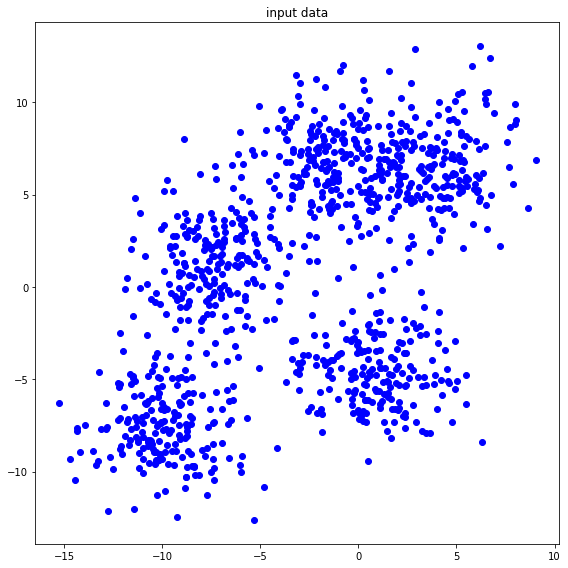

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [4]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    distance = np.power(np.sum(np.power((feature - center), 2), axis=1), 0.5)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [5]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    label_index = np.where(label_feature == label)[0]
    centroid = np.sum(feature[label_index, :], axis=0) / len(label_index)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [6]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    label_feature = np.argmin(distance, axis=1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [101]:
number_cluster          = 2
number_iteration        = 100     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [102]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

loss_02_list = []
loss_iteration_optimal = np.array([np.inf])
centroid_iteration_optimal = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_optimal = np.random.randint(0, number_cluster, size=(number_data))
for trial in range(1000):
    label_feature_02 = np.random.randint(0, number_cluster, size=(number_data))
    for i in range(number_iteration):
        distance = np.zeros((len(feature), number_cluster))
        for label in range(number_cluster):
            centroid_iteration_02[i, label, :] = compute_centroid(feature, label_feature_02, label)
            if np.isnan(centroid_iteration_02[i, label, 0]):
                centroid_iteration_02[i, label, :] = centroid_iteration_02[i-1, label, :]
            distance[:, label] = compute_distance(feature, centroid_iteration_02[i, label, :])
        label_feature_02 = compute_label(distance)
        loss_iteration_02[i] = np.sum(np.power(distance[np.arange(len(distance)), label_feature_02], 2)) / len(feature)
    loss_02_list.append(loss_iteration_02[-1])
    if loss_iteration_02[-1]<loss_iteration_optimal[-1]:
        loss_iteration_optimal = np.copy(loss_iteration_02)
        centroid_iteration_optimal = np.copy(centroid_iteration_02)
        label_feature_optimal = np.copy(label_feature_02)
        print(trial, loss_iteration_optimal[-1])
loss_iteration_02 = np.copy(loss_iteration_optimal)
centroid_iteration_02 = np.copy(centroid_iteration_optimal)
label_feature_02 = np.copy(label_feature_optimal)
print(np.min(loss_02_list), loss_iteration_optimal[-1], loss_iteration_02[-1])

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

0 31.112628811096997
7 31.11233562059308
31.11233562059308 31.11233562059308 31.11233562059308


## the number of clusters $K = 4$

In [105]:
number_cluster          = 4
number_iteration        = 100     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [106]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

loss_04_list = []
loss_iteration_optimal = np.array([np.inf])
centroid_iteration_optimal = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_optimal = np.random.randint(0, number_cluster, size=(number_data))
for trial in range(1000):
    label_feature_04 = np.random.randint(0, number_cluster, size=(number_data))
    for i in range(number_iteration):
        distance = np.zeros((len(feature), number_cluster))
        for label in range(number_cluster):
            centroid_iteration_04[i, label, :] = compute_centroid(feature, label_feature_04, label)
            if np.isnan(centroid_iteration_04[i, label, 0]):
                centroid_iteration_04[i, label, :] = centroid_iteration_04[i-1, label, :]
            distance[:, label] = compute_distance(feature, centroid_iteration_04[i, label, :])
        label_feature_04 = compute_label(distance)
        loss_iteration_04[i] = np.sum(np.power(distance[np.arange(len(distance)), label_feature_04], 2)) / len(feature)
    loss_04_list.append(loss_iteration_04[-1])
    if loss_iteration_04[-1]<loss_iteration_optimal[-1]:
        loss_iteration_optimal = np.copy(loss_iteration_04)
        centroid_iteration_optimal = np.copy(centroid_iteration_04)
        label_feature_optimal = np.copy(label_feature_04)
        print(trial, loss_iteration_optimal[-1])
loss_iteration_04 = np.copy(loss_iteration_optimal)
centroid_iteration_04 = np.copy(centroid_iteration_optimal)
label_feature_04 = np.copy(label_feature_optimal)
print(np.min(loss_04_list), loss_iteration_optimal[-1], loss_iteration_04[-1])

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

C:\Users\주영석\AppData\Local\Temp\ipykernel_25256\24562062.py:8: RuntimeWarning: invalid value encountered in true_divide
  centroid = np.sum(feature[label_index, :], axis=0) / len(label_index)


0 10.583129165002534
10.583129165002534 10.583129165002534 10.583129165002534


## the number of clusters $K = 8$

In [107]:
number_cluster          = 8
number_iteration        = 100     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [108]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

loss_08_list = []
loss_iteration_optimal = np.array([np.inf])
centroid_iteration_optimal = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_optimal = np.random.randint(0, number_cluster, size=(number_data))
for trial in range(10000):
    label_feature_08 = np.random.randint(0, number_cluster, size=(number_data))
    for i in range(number_iteration):
        distance = np.zeros((len(feature), number_cluster))
        for label in range(number_cluster):
            centroid_iteration_08[i, label, :] = compute_centroid(feature, label_feature_08, label)
            if np.isnan(centroid_iteration_08[i, label, 0]):
                centroid_iteration_08[i, label, :] = centroid_iteration_08[i-1, label, :]
            distance[:, label] = compute_distance(feature, centroid_iteration_08[i, label, :])
        label_feature_08 = compute_label(distance)
        loss_iteration_08[i] = np.sum(np.power(distance[np.arange(len(distance)), label_feature_08], 2)) / len(feature)
    loss_08_list.append(loss_iteration_08[-1])
    if loss_iteration_08[-1]<loss_iteration_optimal[-1]:
        loss_iteration_optimal = np.copy(loss_iteration_08)
        centroid_iteration_optimal = np.copy(centroid_iteration_08)
        label_feature_optimal = np.copy(label_feature_08)
        print(trial, loss_iteration_optimal[-1])
loss_iteration_08 = np.copy(loss_iteration_optimal)
centroid_iteration_08 = np.copy(centroid_iteration_optimal)
label_feature_08 = np.copy(label_feature_optimal)
print(np.min(loss_08_list), loss_iteration_optimal[-1], loss_iteration_08[-1])

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

C:\Users\주영석\AppData\Local\Temp\ipykernel_25256\24562062.py:8: RuntimeWarning: invalid value encountered in true_divide
  centroid = np.sum(feature[label_index, :], axis=0) / len(label_index)


0 5.983294194887782
2 5.682072023637314
3 5.679167589385949
57 5.678906040477663
338 5.678841989501764
582 5.678721792256877
5.678721792256877 5.678721792256877 5.678721792256877


## the number of clusters $K = 16$

In [109]:
number_cluster          = 16
number_iteration        = 100     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [110]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

loss_16_list = []
loss_iteration_optimal = np.array([np.inf])
centroid_iteration_optimal = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_optimal = np.random.randint(0, number_cluster, size=(number_data))
for trial in range(100000):
    label_feature_16 = np.random.randint(0, number_cluster, size=(number_data))
    for i in range(number_iteration):
        distance = np.zeros((len(feature), number_cluster))
        for label in range(number_cluster):
            centroid_iteration_16[i, label, :] = compute_centroid(feature, label_feature_16, label)
            if np.isnan(centroid_iteration_16[i, label, 0]):
                centroid_iteration_16[i, label, :] = centroid_iteration_16[i-1, label, :]
            distance[:, label] = compute_distance(feature, centroid_iteration_16[i, label, :])
        label_feature_16 = compute_label(distance)
        loss_iteration_16[i] = np.sum(np.power(distance[np.arange(len(distance)), label_feature_16], 2)) / len(feature)
    loss_16_list.append(loss_iteration_16[-1])
    if loss_iteration_16[-1]<loss_iteration_optimal[-1]:
        loss_iteration_optimal = np.copy(loss_iteration_16)
        centroid_iteration_optimal = np.copy(centroid_iteration_16)
        label_feature_optimal = np.copy(label_feature_16)
        print(trial, loss_iteration_optimal[-1])
loss_iteration_16 = np.copy(loss_iteration_optimal)
centroid_iteration_16 = np.copy(centroid_iteration_optimal)
label_feature_16 = np.copy(label_feature_optimal)
print(np.min(loss_16_list), loss_iteration_optimal[-1], loss_iteration_16[-1])

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

C:\Users\주영석\AppData\Local\Temp\ipykernel_25256\24562062.py:8: RuntimeWarning: invalid value encountered in true_divide
  centroid = np.sum(feature[label_index, :], axis=0) / len(label_index)


0 3.0421041785588834
1 3.0395131539673894
25 3.0373187643287576
63 3.037259865170404
117 3.0329347922941188
159 3.032203047506161
191 3.0169058346573427
51782 3.0168558573818594
3.0168558573818594 3.0168558573818594 3.0168558573818594


---

---

## functions for presenting the results

---

---

In [17]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [18]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [19]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [20]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [21]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [22]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [23]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [24]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [25]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(centroid_iteration_02[:, :, 0], centroid_iteration_02[:, :, 1], '-')
    plt.plot(centroid_iteration_02[0, :, 0], centroid_iteration_02[0, :, 1], 'bo', label='initial')
    plt.plot(centroid_iteration_02[-1, :, 0], centroid_iteration_02[-1, :, 1], 'rs', label='final')
    plt.legend(['cluster={:d}'.format(i) for i in range(2)] + ['initial', 'final'])
    plt.tight_layout()
    plt.show()
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [26]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(centroid_iteration_04[:, :, 0], centroid_iteration_04[:, :, 1], '-')
    plt.plot(centroid_iteration_04[0, :, 0], centroid_iteration_04[0, :, 1], 'bo', label='initial')
    plt.plot(centroid_iteration_04[-1, :, 0], centroid_iteration_04[-1, :, 1], 'rs', label='final')
    plt.legend(['cluster={:d}'.format(i) for i in range(4)] + ['initial', 'final'])
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [27]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(centroid_iteration_08[:, :, 0], centroid_iteration_08[:, :, 1], '-')
    plt.plot(centroid_iteration_08[0, :, 0], centroid_iteration_08[0, :, 1], 'bo', label='initial')
    plt.plot(centroid_iteration_08[-1, :, 0], centroid_iteration_08[-1, :, 1], 'rs', label='final')
    plt.legend(['cluster={:d}'.format(i) for i in range(8)] + ['initial', 'final'])
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [28]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(centroid_iteration_16[:, :, 0], centroid_iteration_16[:, :, 1], '-')
    plt.plot(centroid_iteration_16[0, :, 0], centroid_iteration_16[0, :, 1], 'bo', label='initial')
    plt.plot(centroid_iteration_16[-1, :, 0], centroid_iteration_16[-1, :, 1], 'rs', label='final')
    plt.legend(['cluster={:d}'.format(i) for i in range(16)] + ['initial', 'final'])
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [29]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    cmap = colors.ListedColormap(['darkblue', 'darkred'])
    sc = plt.scatter(x, y, c=label_feature_02, cmap=cmap, vmin=-0.5, vmax=1.5)
    cb = plt.colorbar(sc, ticks=range(2))
    cb.set_label('cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [30]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    cmap = colors.ListedColormap(['darkblue', 'cyan', 'gold', 'darkred'])
    sc = plt.scatter(x, y, c=label_feature_04, cmap=cmap, vmin=-0.5, vmax=3.5)
    cb = plt.colorbar(sc, ticks=range(4))
    cb.set_label('cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [31]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    cmap = colors.ListedColormap(['darkblue', 'blue', 'lightskyblue', 'palegreen', 'greenyellow', 'orange', 'red', 'darkred'])
    sc = plt.scatter(x, y, c=label_feature_08, cmap=cmap, vmin=-0.5, vmax=7.5)
    cb = plt.colorbar(sc, ticks=range(8))
    cb.set_label('cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [32]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    cmap = colors.ListedColormap(['darkblue', 'mediumblue', 'blue', 'royalblue', 'cornflowerblue', 'lightskyblue', 'cyan', 'lightgreen', 'lawngreen', 'greenyellow', 'gold', 'orange', 'darkorange', 'red', 'firebrick', 'darkred'])
    sc = plt.scatter(x, y, c=label_feature_16, cmap=cmap, vmin=-0.5, vmax=15.5)
    cb = plt.colorbar(sc, ticks=range(16))
    cb.set_label('cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 31.1123356206
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 10.5831291650
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  5.6787217923
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  3.0168558574
**************************************************
## [RESULT 05]
**************************************************


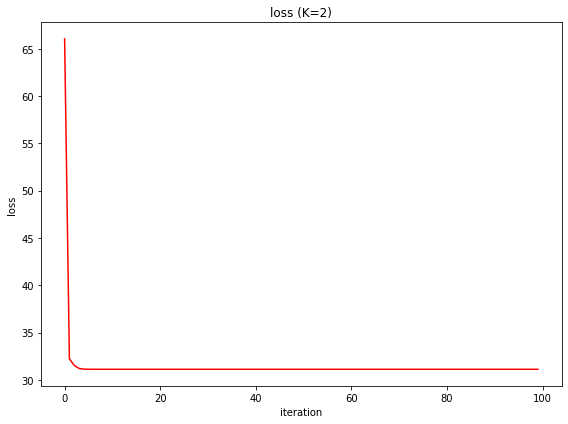

**************************************************
## [RESULT 06]
**************************************************


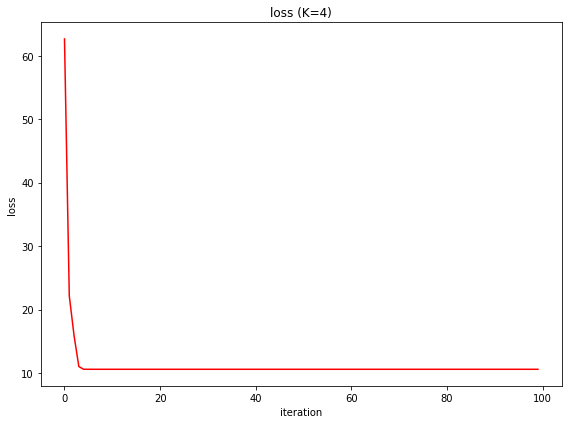

**************************************************
## [RESULT 07]
**************************************************


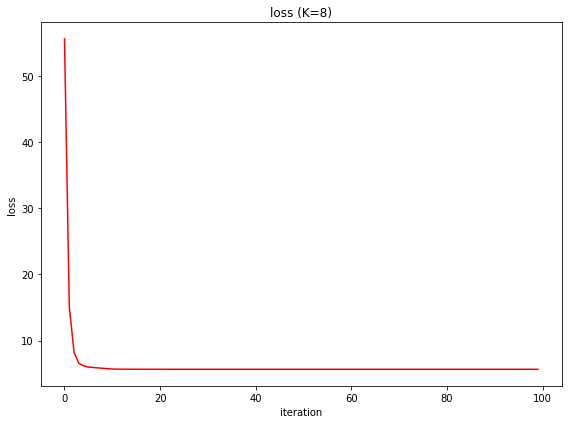

**************************************************
## [RESULT 08]
**************************************************


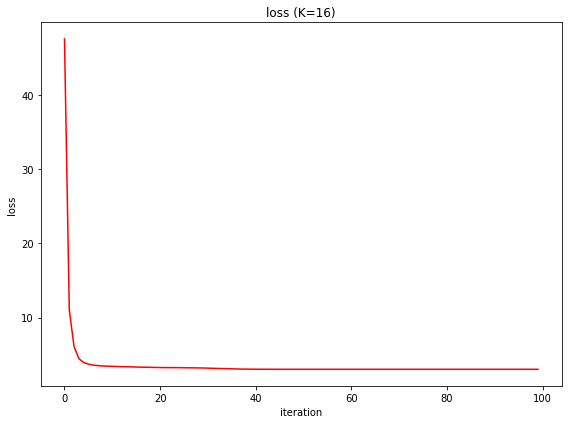

**************************************************
## [RESULT 09]
**************************************************


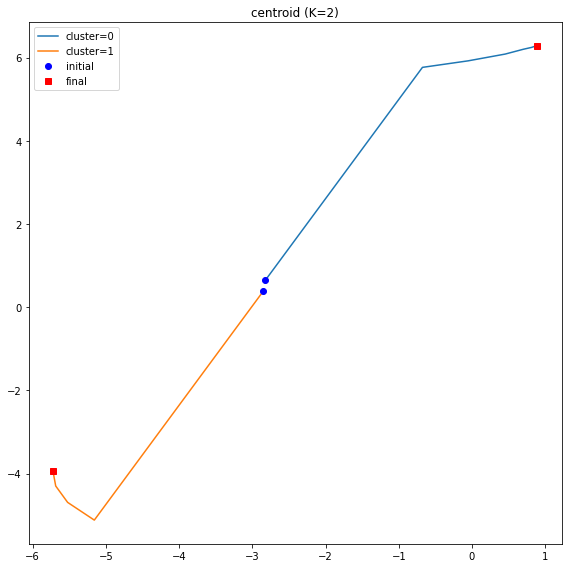

**************************************************
## [RESULT 10]
**************************************************


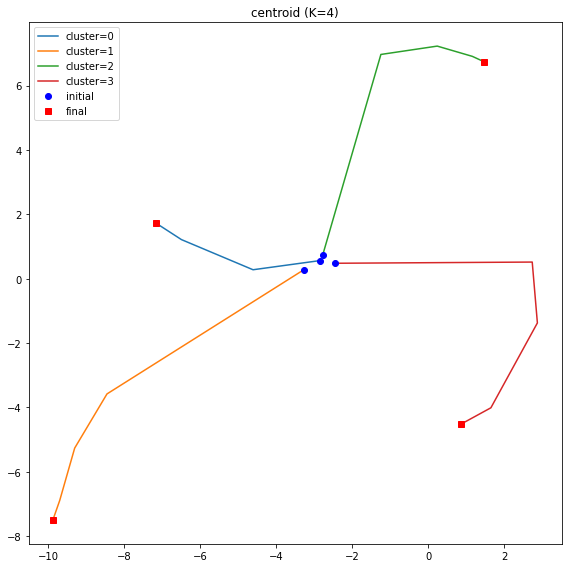

**************************************************
## [RESULT 11]
**************************************************


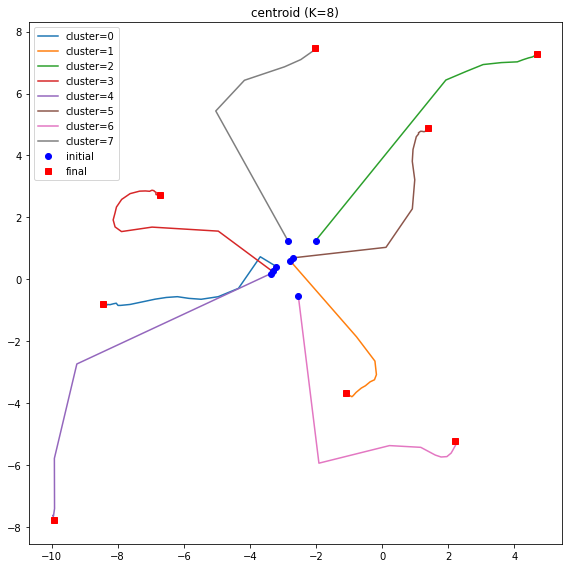

**************************************************
## [RESULT 12]
**************************************************


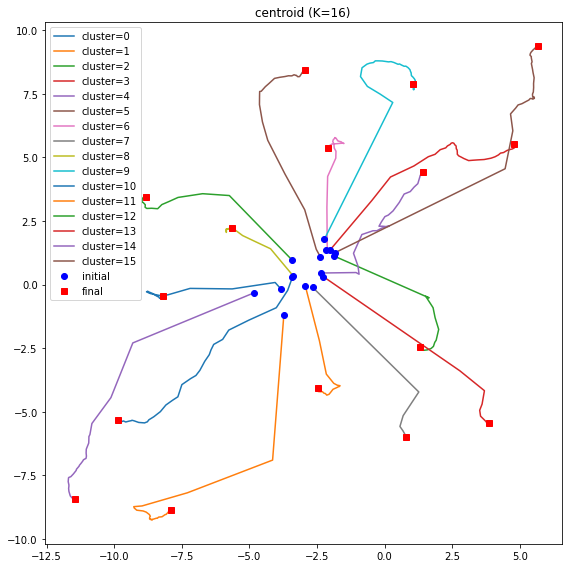

**************************************************
## [RESULT 13]
**************************************************


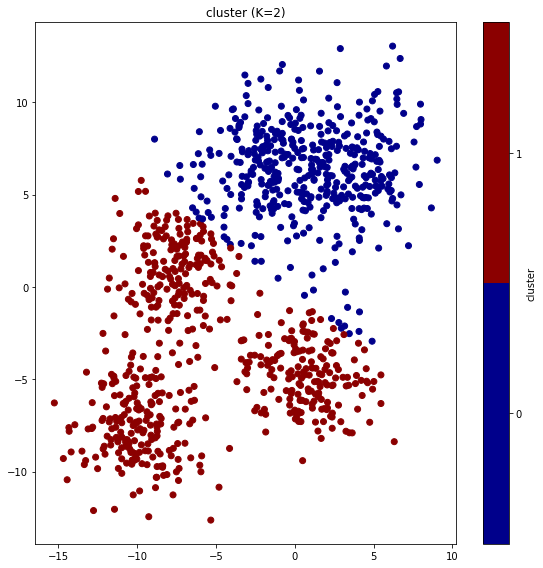

**************************************************
## [RESULT 14]
**************************************************


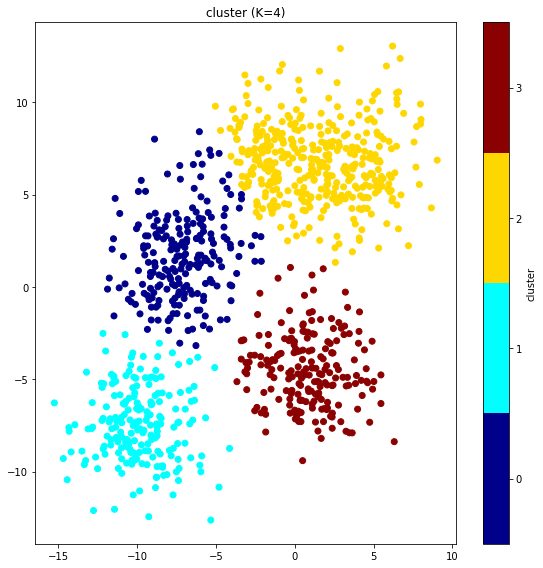

**************************************************
## [RESULT 15]
**************************************************


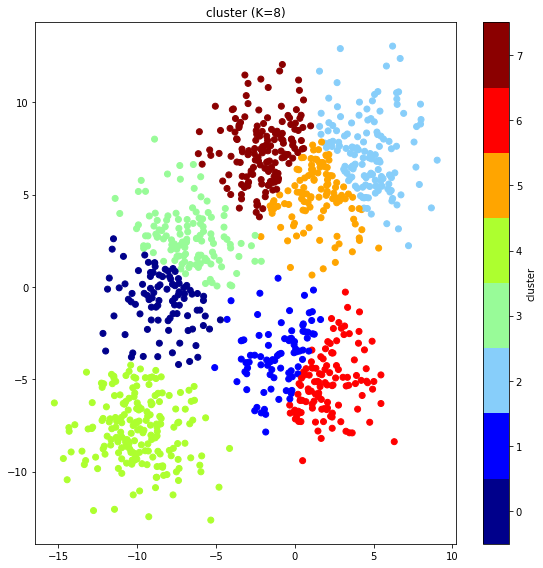

**************************************************
## [RESULT 16]
**************************************************


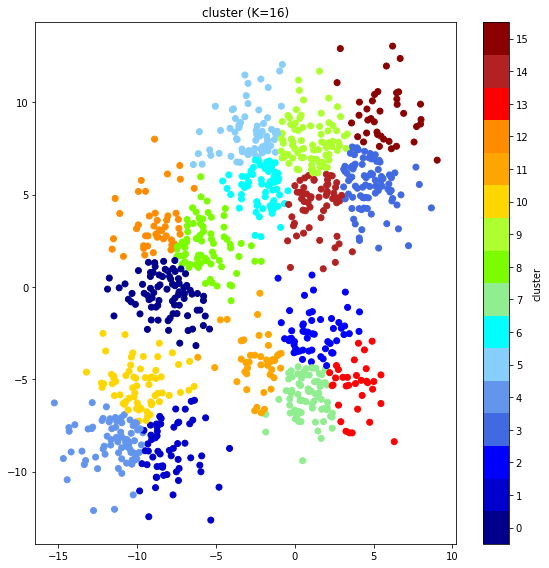

In [111]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)